# topDown
- train
  - ratio: 0.1, weight: 0.01만 하자
- t-sne를 통한 epoch에 따른 변화
- epoch마다 sampled data에 실제 noise가 얼마나 들어있는지

## 1. T-sne를 통한 epoch에 따른 sampled data 변화
- noise
  - ratio, weight 마다 확인

잘된 케이스 시각화

In [1]:
from sklearn.manifold import TSNE
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# def _normalize_tabular(df: pd.DataFrame, label_name: str = "label"):
#     scaler = StandardScaler()
#     X = scaler.fit_transform(df.drop(label_name, axis=1))
#     y = df[label_name]
#     return X, y

# def simul_split_train_valid_test(df: pd.DataFrame, train_ratio: float = 0.7):
#     X, y = _normalize_tabular(df)
#     tmp = pd.DataFrame(X)
#     tmp["label"] = y
#     normal = tmp.loc[tmp["label"] == 0, :].reset_index(drop=True)
#     abnormal = tmp.loc[tmp["label"] == 1, :].reset_index(drop=True)
#     X_train, X_val_test, y_train, y_val_test = train_test_split(
#         normal.drop("label", axis=1),
#         normal["label"],
#         train_size=train_ratio,
#         random_state=42,
#         shuffle=False,
#     )
    
#     X_val, X_test, y_val, y_test = train_test_split(
#         X_val_test, y_val_test, train_size=0.5, random_state=42, shuffle=False
#     )
#     X_test["label"] = y_test
#     X_test = pd.concat([X_test, abnormal]).reset_index(drop=True)
#     return (
#         X_train.values,
#         X_val.values,
#         X_test.drop("label", axis=1).values,
#         y_train.values,
#         y_val.values,
#         X_test["label"].values,
#     )

In [71]:
# data = pd.read_csv('./sim_data/smallTrainNoise_010_09.csv')

# (
#     train_x,
#     _,
#     _,
#     _,
#     _,
#     _,
# ) = simul_split_train_valid_test(data, 0.7)

<ipython-input-69-c9eb5218e970>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["label"] = y_test


In [87]:
# X_tsne = TSNE(n_components=2).fit_transform(train_x)

In [93]:
# down_pickle_name = [data for data in os.listdir('./run_result_sim_down') if 'smallTrainNoise_010_09' in data]
# down_pickle_name

['newDown_smallTrainNoise_010_09_h2_st1_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st1_sr0.1_ie5_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st5_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st5_sr0.1_ie5_0.pickle']

In [94]:
# top_pickle_name = [data for data in os.listdir('./run_result_sim_top') if 'smallTrainNoise_010_09' in data]
# top_pickle_name

['newTop_smallTrainNoise_010_09_h2_st1_sr0.1_ie20_0.pickle',
 'newTop_smallTrainNoise_010_09_h2_st1_sr0.1_ie5_0.pickle',
 'newTop_smallTrainNoise_010_09_h2_st5_sr0.1_ie20_0.pickle',
 'newTop_smallTrainNoise_010_09_h2_st5_sr0.1_ie5_0.pickle']

In [95]:
# down_data_name = down_pickle_name[0]
# with open('./run_result_sim_down/' + down_data_name, 'rb') as f:
#     down = pickle.load(f)
    
# top_data_name = top_pickle_name[0]
# with open('./run_result_sim_top/' + top_data_name, 'rb') as f:
#     top = pickle.load(f)

In [108]:
# def show_top_down(epoch, train_x, down, top, X_tsne, figsize=(16,5)):
#     idx = epoch
#     plt.subplots(1,2, figsize=figsize)

#     color = np.zeros(len(train_x))
#     color= pd.Series(color)
#     color[down[:, idx]] = 1
#     plt.subplot(121)
#     plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
#     plt.title(f'NewTrainer in epoch={idx}, high recon-error data (yellow)')

#     color = np.zeros(len(train_x))
#     color= pd.Series(color)
#     color[top[:, idx]] = 1
#     plt.subplot(122)
#     plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
#     plt.title(f'NewTrainer in epoch={idx}, low recon-error data (yellow)')

## 2. epoch마다 sampled data에 실제 noise가 얼마나 들어있는지

- epoch 500으로 진행한 경우 평균내기

잘된 경우 시각화해서 사용

In [2]:
import os

os.listdir('./run_result_sim_down')

['newDown_smallTrainNoise_001_01_h2_st1_sr0.01_ie20_0.pickle',
 'newDown_smallTrainNoise_001_01_h2_st1_sr0.01_ie5_0.pickle',
 'newDown_smallTrainNoise_001_01_h2_st5_sr0.01_ie20_0.pickle',
 'newDown_smallTrainNoise_001_01_h2_st5_sr0.01_ie5_0.pickle',
 'newDown_smallTrainNoise_001_09_h2_st1_sr0.01_ie20_0.pickle',
 'newDown_smallTrainNoise_001_09_h2_st1_sr0.01_ie5_0.pickle',
 'newDown_smallTrainNoise_001_09_h2_st5_sr0.01_ie20_0.pickle',
 'newDown_smallTrainNoise_001_09_h2_st5_sr0.01_ie5_0.pickle',
 'newDown_smallTrainNoise_010_01_h2_st1_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_01_h2_st1_sr0.1_ie5_0.pickle',
 'newDown_smallTrainNoise_010_01_h2_st5_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_01_h2_st5_sr0.1_ie5_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st1_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st1_sr0.1_ie5_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st5_sr0.1_ie20_0.pickle',
 'newDown_smallTrainNoise_010_09_h2_st5_sr0.1_ie5_0.pickle',
 'newDow

In [7]:
with open('./sim_data/smallTrainNoise_010_09.pickle', 'rb') as f:
    noise_010_09 = pickle.load(f)

with open('./run_result_sim_down/newDown_smallTrainNoise_010_09_h2_st1_sr0.1_ie20_0.pickle', 'rb') as f:
    down_010_09 = pickle.load(f)

In [9]:
down_010_09[:, 100]

array([11646.,  9935., 13731., ..., 10875.,  3157.,  5458.])

In [4]:
noise_010_09

array([13766, 24956, 15388, ..., 19210,   899,  4098])

In [6]:
noise_010_09.shape

(2303,)

In [17]:
down_001_01 = np.zeros((500,))
down_001_09 = np.zeros((500,))
down_010_01 = np.zeros((500,))
down_010_09 = np.zeros((500,))

In [64]:
def show_down(down, noise_idx, sampling_ratio):
    # down에 포함된 noise의 수
    total_count = []
    for epoch in range(down.shape[1]):
        count = 0
        for d in down[:, epoch]:
            if d in noise_idx:
                count += 1
        total_count.append(count)
    # 매 epoch마다 뽑힌 niose의 비율
    x = np.array(total_count) / int(down.shape[0] / sampling_ratio)
    return x

In [65]:
with open('./sim_data/smallTrainNoise_001_01.pickle', 'rb') as f:
    noise_001_01 = pickle.load(f)
with open('./sim_data/smallTrainNoise_001_09.pickle', 'rb') as f:
    noise_001_09 = pickle.load(f)
with open('./sim_data/smallTrainNoise_010_01.pickle', 'rb') as f:
    noise_010_01 = pickle.load(f)
with open('./sim_data/smallTrainNoise_010_09.pickle', 'rb') as f:
    noise_010_09 = pickle.load(f)
    
for data in [data for data in os.listdir('./run_result_sim_down') if 'smallTrainNoise_001_01' in data]:
    with open('./run_result_sim_down/' + data, 'rb') as f:
        tmp = pickle.load(f)
    x = show_down(tmp, noise_001_01, 0.01)
    down_001_01 += x / 4.0
    
for data in [data for data in os.listdir('./run_result_sim_down') if 'smallTrainNoise_001_09' in data]:
    with open('./run_result_sim_down/' + data, 'rb') as f:
        tmp = pickle.load(f)
    x = show_down(tmp, noise_001_09, 0.01)
    down_001_09 += x / 4.0
    
for data in [data for data in os.listdir('./run_result_sim_down') if 'smallTrainNoise_010_01' in data]:
    with open('./run_result_sim_down/' + data, 'rb') as f:
        tmp = pickle.load(f)
    x = show_down(tmp, noise_010_01, 0.1)
    down_010_01 += x / 4.0
    
for data in [data for data in os.listdir('./run_result_sim_down') if 'smallTrainNoise_010_09' in data]:
    with open('./run_result_sim_down/' + data, 'rb') as f:
        tmp = pickle.load(f)
    x = show_down(tmp, noise_010_09, 0.1)
    down_010_09 += x / 4.0


Text(0.5, 1.0, 'Sampled-out noise ratio in 4 data concept')

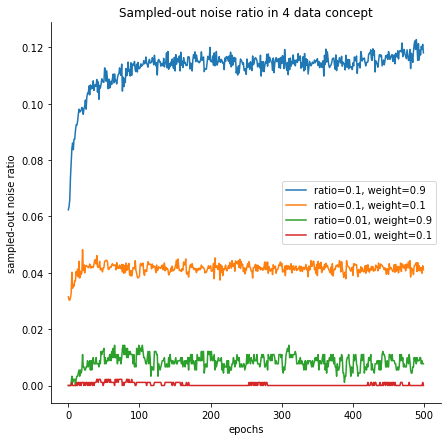

In [66]:

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(down_010_09)
ax.plot(down_010_01)
ax.plot(down_001_09)
ax.plot(down_001_01)
ax.legend(['ratio=0.1, weight=0.9', 'ratio=0.1, weight=0.1', 'ratio=0.01, weight=0.9', 'ratio=0.01, weight=0.1'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs')
ax.set_ylabel('sampled-out noise ratio')
plt.title('Sampled-out noise ratio in 4 data concept')